In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

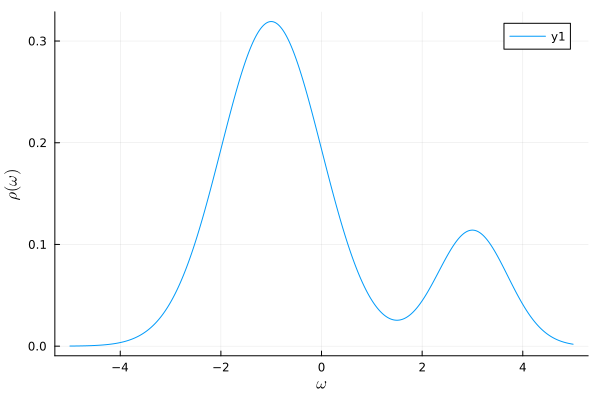

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+5
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 32
H=1
Iter     Function value   Gradient norm 
     0     1.985963e+02     2.286801e+02
 * time: 0.016447782516479492
     1     1.729221e+02     5.921726e+00
 * time: 1.3339729309082031
     2     9.632050e+01     4.390820e+00
 * time: 1.5296509265899658
     3     7.540143e+01     3.648643e+00
 * time: 1.8594088554382324
     4     6.010812e+01     3.276187e+00
 * time: 2.181867837905884
     5     5.769362e+01     1.448029e+01
 * time: 2.7637929916381836
     6     5.743735e+01     1.096215e+01
 * time: 2.951610803604126
     7     5.711353e+01     9.667634e+00
 * time: 3.1326818466186523
     8     5.344920e+01     3.598293e+00
 * time: 3.4041268825531006
     9     1.988807e+01     1.711586e+01
 * time: 4.043532848358154
    10     1.764576e+01     2.163771e+01
 * time: 4.723485946655273
    11     1.742785e+01     4.816792e+00
 * time: 4.861001968383789
    12     1.722172e+01     1.153438e+00
 * time: 5.377584934234619
    13     1.716087e+01     1.684152e+0

   119     1.442490e+01     4.783951e-01
 * time: 27.060356855392456
   120     1.441973e+01     6.359444e+00
 * time: 27.176801919937134
   121     1.441966e+01     5.635736e-01
 * time: 27.71296000480652
   122     1.441957e+01     5.983774e+00
 * time: 27.817415952682495
   123     1.441951e+01     5.731716e-01
 * time: 28.34817099571228
   124     1.441938e+01     7.769316e+00
 * time: 28.478251934051514
   125     1.441928e+01     5.750356e-01
 * time: 28.942291975021362
   126     1.441914e+01     7.929227e+00
 * time: 29.080538988113403
   127     1.441904e+01     5.751014e-01
 * time: 29.44937801361084
   128     1.441890e+01     7.725180e+00
 * time: 29.580339908599854
   129     1.441880e+01     5.703886e-01
 * time: 29.958881855010986
   130     1.441869e+01     5.936437e+00
 * time: 30.088496923446655
   131     1.441864e+01     5.657796e-01
 * time: 30.361893892288208
   132     1.441857e+01     3.471911e+00
 * time: 30.4629487991333
   133     1.441855e+01     5.653677e-0

   240     1.441629e+01     6.227180e-01
 * time: 48.34935998916626
   241     1.441628e+01     9.329709e-01
 * time: 48.50396180152893
   242     1.441628e+01     6.304233e-01
 * time: 48.649972915649414
   243     1.441628e+01     9.764731e-01
 * time: 48.800516843795776
   244     1.441628e+01     6.352590e-01
 * time: 48.910467863082886
   245     1.441628e+01     1.001543e+00
 * time: 49.048245906829834
   246     1.441628e+01     6.299029e-01
 * time: 49.199410915374756
   247     1.441627e+01     1.012519e+00
 * time: 49.36221981048584
   248     1.441627e+01     6.184084e-01
 * time: 49.4768328666687
   249     1.441627e+01     1.022671e+00
 * time: 49.63428497314453
   250     1.441627e+01     6.069834e-01
 * time: 49.78832697868347
   251     1.441627e+01     1.040167e+00
 * time: 49.93139600753784
   252     1.441626e+01     5.990513e-01
 * time: 50.07197284698486
   253     1.441626e+01     1.063401e+00
 * time: 50.17776083946228
   254     1.441626e+01     5.944402e-01
 * 

   361     1.441533e+01     1.947265e+00
 * time: 67.06913685798645
   362     1.441532e+01     5.313110e-01
 * time: 67.23177480697632
   363     1.441531e+01     2.229492e+00
 * time: 67.4453239440918
   364     1.441531e+01     5.297919e-01
 * time: 67.58904790878296
   365     1.441530e+01     2.704627e+00
 * time: 67.80232501029968
   366     1.441529e+01     5.318874e-01
 * time: 67.94918179512024
   367     1.441522e+01     2.625292e+00
 * time: 68.19698596000671
   368     1.441521e+01     6.222873e-01
 * time: 68.3367829322815
   369     1.441516e+01     5.285321e-01
 * time: 68.53282690048218
   370     1.441514e+01     2.893040e+00
 * time: 68.82125496864319
   371     1.441513e+01     5.922473e-01
 * time: 68.93321394920349
   372     1.441513e+01     5.792550e-01
 * time: 69.15077185630798
   373     1.441512e+01     1.777473e+00
 * time: 69.36087989807129
   374     1.441512e+01     5.762293e-01
 * time: 69.58556985855103
   375     1.441511e+01     2.040935e+00
 * time: 

   482     1.441271e+01     8.204749e-01
 * time: 87.71587896347046
   483     1.441271e+01     6.764931e-01
 * time: 87.82631778717041
   484     1.441270e+01     8.124207e-01
 * time: 87.98482584953308
   485     1.441270e+01     6.756698e-01
 * time: 88.13374280929565
   486     1.441270e+01     8.071753e-01
 * time: 88.27579593658447
   487     1.441270e+01     6.756290e-01
 * time: 88.42868995666504
   488     1.441270e+01     8.071794e-01
 * time: 88.53871393203735
   489     1.441270e+01     6.754165e-01
 * time: 88.68358898162842
   490     1.441270e+01     8.113390e-01
 * time: 88.82640385627747
   491     1.441270e+01     6.736066e-01
 * time: 88.98318195343018
   492     1.441270e+01     8.172749e-01
 * time: 89.09384989738464
   493     1.441270e+01     6.692602e-01
 * time: 89.2493109703064
   494     1.441269e+01     8.232099e-01
 * time: 89.42446684837341
   495     1.441269e+01     6.627014e-01
 * time: 89.57825994491577
   496     1.441269e+01     8.286687e-01
 * time:

    99     1.242992e+01     4.315994e+00
 * time: 26.03245997428894
   100     1.242918e+01     2.836327e+00
 * time: 26.7519690990448
   101     1.242873e+01     2.653446e+00
 * time: 27.424342155456543
   102     1.238901e+01     4.008829e+01
 * time: 28.54168200492859
   103     1.236879e+01     2.893077e+00
 * time: 30.489521026611328
   104     1.236878e+01     2.774808e+00
 * time: 30.756864070892334
   105     1.236867e+01     2.845968e+00
 * time: 30.885934114456177
   106     1.236834e+01     3.725192e+00
 * time: 31.203083992004395
   107     1.236824e+01     2.982594e+00
 * time: 31.841230154037476
   108     1.236800e+01     3.652799e+00
 * time: 32.157536029815674
   109     1.236788e+01     2.879277e+00
 * time: 32.76264405250549
   110     1.236754e+01     5.354493e+00
 * time: 33.332311153411865
   111     1.236720e+01     2.810605e+00
 * time: 33.892914056777954
   112     1.236653e+01     7.710395e+00
 * time: 34.744555950164795
   113     1.236586e+01     2.825156e+0

   219     1.220781e+01     7.119855e+00
 * time: 246.74772810935974
   220     1.220780e+01     2.548182e+00
 * time: 248.94276309013367
   221     1.220780e+01     7.133457e+00
 * time: 252.3146951198578
   222     1.220779e+01     2.548052e+00
 * time: 255.20593094825745
   223     1.220779e+01     7.146433e+00
 * time: 258.3322751522064
   224     1.220778e+01     2.547922e+00
 * time: 260.57008600234985
   225     1.220778e+01     7.159499e+00
 * time: 263.9289040565491
   226     1.220777e+01     2.547787e+00
 * time: 266.1926910877228
   227     1.220777e+01     7.173194e+00
 * time: 269.2178900241852
   228     1.220776e+01     2.547640e+00
 * time: 271.45555210113525
   229     1.220776e+01     7.188225e+00
 * time: 274.37805700302124
   230     1.220775e+01     2.547471e+00
 * time: 276.4865720272064
   231     1.220775e+01     7.205977e+00
 * time: 279.32541608810425
   232     1.220774e+01     2.547246e+00
 * time: 281.42154812812805
   233     1.220774e+01     7.230554e+00

   340     1.220705e+01     2.499711e+00
 * time: 707.0485191345215
   341     1.220705e+01     5.971159e+00
 * time: 710.5120871067047
   342     1.220705e+01     2.499584e+00
 * time: 716.9074599742889
   343     1.220704e+01     5.979651e+00
 * time: 720.2287919521332
   344     1.220704e+01     2.497641e+00
 * time: 726.2695600986481
   345     1.220704e+01     6.133164e+00
 * time: 729.5062761306763
   346     1.220703e+01     2.496886e+00
 * time: 737.1093690395355
   347     1.220703e+01     6.195871e+00
 * time: 741.3945381641388
   348     1.220703e+01     4.593342e+00
 * time: 748.6111130714417
   349     1.220703e+01     2.530442e+00
 * time: 754.2724800109863
   350     1.220702e+01     4.597202e+00
 * time: 757.4251930713654
   351     1.220702e+01     2.530314e+00
 * time: 763.0302929878235
   352     1.220702e+01     4.600339e+00
 * time: 766.2193670272827
   353     1.220702e+01     2.530192e+00
 * time: 771.9448399543762
   354     1.220702e+01     4.603345e+00
 * time

    27     7.615624e+01     1.095555e+01
 * time: 10.654468059539795
    28     7.396093e+01     2.849667e+01
 * time: 11.018784999847412
    29     7.316530e+01     9.549142e+00
 * time: 11.765094995498657
    30     7.289313e+01     2.645937e+01
 * time: 12.096551895141602
    31     7.218178e+01     1.481525e+01
 * time: 12.541240930557251
    32     7.057541e+01     1.490770e+01
 * time: 12.897789001464844
    33     7.006855e+01     5.618495e+00
 * time: 13.322679042816162
    34     6.902362e+01     2.013927e+01
 * time: 13.981795072555542
    35     6.800811e+01     1.573748e+01
 * time: 14.977576971054077
    36     6.741733e+01     6.650721e+01
 * time: 16.28928303718567
    37     6.687378e+01     4.510532e+01
 * time: 17.8094539642334
    38     6.642818e+01     1.788825e+01
 * time: 18.85449504852295
    39     6.507359e+01     2.845347e+01
 * time: 19.75005006790161
    40     6.488289e+01     1.269915e+01
 * time: 21.535392999649048
    41     6.431251e+01     4.495480e+0

   147     5.372462e+01     2.508390e+01
 * time: 301.13330006599426
   148     5.371830e+01     2.764965e+02
 * time: 304.733855009079
   149     5.371168e+01     2.529764e+01
 * time: 309.74704694747925
   150     5.370429e+01     3.021186e+02
 * time: 312.92225408554077
   151     5.369649e+01     2.591246e+01
 * time: 317.78243803977966
   152     5.368321e+01     4.160675e+02
 * time: 321.5103859901428
   153     5.366851e+01     2.636953e+01
 * time: 328.45489287376404
   154     5.364477e+01     5.968010e+02
 * time: 331.6582419872284
   155     5.361624e+01     2.726417e+01
 * time: 337.6998510360718
   156     5.349559e+01     3.780876e+02
 * time: 340.52075695991516
   157     5.348701e+01     2.663828e+01
 * time: 346.35986399650574
   158     5.345086e+01     1.018550e+03
 * time: 350.0694229602814
   159     5.339467e+01     2.814198e+01
 * time: 357.04061007499695
   160     5.338171e+01     2.162219e+02
 * time: 360.7921450138092
   161     5.337932e+01     2.994412e+01


   268     5.303974e+01     3.424012e+01
 * time: 828.3090748786926
   269     5.303956e+01     8.688297e+01
 * time: 833.9138848781586
   270     5.303940e+01     5.596817e+01
 * time: 838.1088619232178
   271     5.303934e+01     3.243207e+01
 * time: 843.526524066925
   272     5.303932e+01     2.489841e+01
 * time: 848.8299059867859
   273     5.303924e+01     6.140953e+01
 * time: 853.5959300994873
   274     5.303917e+01     2.756064e+01
 * time: 859.0299959182739
   275     5.303911e+01     6.111718e+01
 * time: 863.9964029788971
   276     5.303904e+01     2.872745e+01
 * time: 869.5344099998474
   277     5.303897e+01     5.909044e+01
 * time: 874.9400360584259
   278     5.303891e+01     1.995211e+01
 * time: 880.1779270172119
   279     5.303874e+01     1.016602e+02
 * time: 885.5383760929108
   280     5.303856e+01     2.008584e+01
 * time: 891.1891589164734
   281     5.303838e+01     1.017841e+02
 * time: 897.0428879261017
   282     5.303821e+01     2.001624e+01
 * time:

    14     8.236683e+01     1.106424e+00
 * time: 4.6549460887908936
    15     8.089760e+01     1.438102e+00
 * time: 4.816064119338989
    16     8.000963e+01     1.223022e+00
 * time: 4.98045015335083
    17     7.960180e+01     5.908444e+00
 * time: 5.245990037918091
    18     7.276363e+01     4.979197e+00
 * time: 5.472015142440796
    19     6.048711e+01     1.657332e+02
 * time: 6.117422103881836
    20     5.062165e+01     8.545985e+00
 * time: 7.2487711906433105
    21     4.593402e+01     4.863428e+00
 * time: 7.415003061294556
    22     4.189313e+01     5.483622e+00
 * time: 7.71029806137085
    23     3.659729e+01     1.927067e+00
 * time: 8.2814621925354
    24     3.576118e+01     2.287459e+00
 * time: 8.509469032287598
    25     3.294982e+01     3.479459e+00
 * time: 8.773906230926514
    26     2.593402e+01     2.373108e+00
 * time: 9.097150087356567
    27     2.527983e+01     1.887948e+00
 * time: 9.319183111190796
    28     2.439178e+01     2.052784e+00
 * time: 

   134     5.135574e+00     7.738771e-01
 * time: 37.255956172943115
   135     5.125094e+00     6.276996e-01
 * time: 37.488192081451416
   136     5.118247e+00     4.991082e-01
 * time: 37.78788614273071
   137     5.110625e+00     3.438958e-01
 * time: 38.052080154418945
   138     5.102753e+00     2.490380e-01
 * time: 38.31485605239868
   139     5.099429e+00     2.316998e-01
 * time: 38.57861113548279
   140     5.096899e+00     1.587797e-01
 * time: 38.82005500793457
   141     5.093294e+00     1.739198e-01
 * time: 39.074066162109375
   142     5.092578e+00     1.543370e-01
 * time: 39.235581159591675
   143     5.091616e+00     1.482242e-01
 * time: 39.39823007583618
   144     5.090621e+00     1.624262e-01
 * time: 39.562605142593384
   145     5.089508e+00     1.660223e-01
 * time: 39.730600118637085
   146     5.088195e+00     2.167835e-01
 * time: 39.89709520339966
   147     5.087051e+00     1.941908e-01
 * time: 40.061697006225586
   148     5.085964e+00     2.224122e-01

   254     4.934363e+00     1.238855e-06
 * time: 58.62116622924805
   255     4.934363e+00     6.932871e-07
 * time: 58.78613901138306
   256     4.934363e+00     9.616239e-07
 * time: 58.950597047805786
   257     4.934363e+00     6.036176e-07
 * time: 59.10907816886902
   258     4.934363e+00     7.312377e-07
 * time: 59.26932907104492
   259     4.934363e+00     4.664479e-07
 * time: 59.44523310661316
   260     4.934363e+00     5.193579e-07
 * time: 59.5898871421814
   261     4.934363e+00     2.806433e-07
 * time: 59.75006818771362
   262     4.934363e+00     3.372200e-07
 * time: 59.91255307197571
   263     4.934363e+00     1.446449e-07
 * time: 60.07182216644287
   264     4.934363e+00     2.150721e-07
 * time: 60.23014307022095
   265     4.934363e+00     9.581167e-08
 * time: 60.39685106277466
   266     4.934363e+00     1.387341e-07
 * time: 60.58308410644531
   267     4.934363e+00     9.215618e-08
 * time: 60.746952056884766
   268     4.934363e+00     9.198218e-08
 * tim

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=5
Iter     Function value   Gradient norm 
     0     1.123007e-01     9.215865e-09
 * time: 0.00016808509826660156
max_theta=0.9187107356131692222943232661366405260117
hardy optimization was success.
H=6
Iter     Function value   Gradient norm 
     0     1.123007e-01     1.198347e+00
 * time: 0.00018215179443359375
     1     1.083157e-01     7.524397e-01
 * time: 0.18940997123718262
     2     9.761676e-02     9.121165e-01
 * time: 0.5074920654296875
     3     8.856342e-02     1.089486e+00
 * time: 0.8722059726715088
     4     8.593351e-02     1.058234e+00
 * time: 1.0539779663085938
     5     7.540380e-02     9.600994e-01
 * time: 1.438302993774414
     6     5.819010e-02     6.095646e-01
 * time: 1.617311954498291
     7     4.657173e-02     6.554002e-01
 * time: 1.8988170623779297
     8     3.176167e-02     4.257089e-01
 * time: 2.176635980606079
     9     2.886623e-02     3.615822e-01
 * time: 2.3874881267547607
    10     2.562790e-02     2.132509e-01
 * time: 2.57149004

    32     1.876080e-03     8.865013e-05
 * time: 8.550731182098389
    33     1.876080e-03     3.698982e-05
 * time: 8.759428977966309
    34     1.876080e-03     2.040181e-05
 * time: 9.080435037612915
    35     1.876080e-03     9.485731e-06
 * time: 9.290316104888916
    36     1.876080e-03     4.571628e-06
 * time: 9.499938011169434
    37     1.876080e-03     1.924888e-06
 * time: 9.733690023422241
    38     1.876080e-03     1.132727e-06
 * time: 10.034272193908691
    39     1.876080e-03     4.595487e-07
 * time: 10.263979196548462
    40     1.876080e-03     2.134444e-07
 * time: 10.473008155822754
    41     1.876080e-03     1.026853e-07
 * time: 10.681430101394653
    42     1.876080e-03     5.536998e-08
 * time: 10.88651418685913
    43     1.876080e-03     2.358617e-08
 * time: 11.098353147506714
    44     1.876080e-03     1.195863e-08
 * time: 11.421622037887573
    45     1.876080e-03     5.498475e-09
 * time: 11.633275032043457
max_theta=0.90774346255959450457618931513

    50     2.024710e-04     5.183964e-06
 * time: 15.356298923492432
    51     2.024710e-04     2.934068e-06
 * time: 15.594640016555786
    52     2.024710e-04     1.726810e-06
 * time: 15.833545923233032
    53     2.024710e-04     8.149417e-07
 * time: 16.10774803161621
    54     2.024710e-04     4.886477e-07
 * time: 16.348275899887085
    55     2.024710e-04     2.809298e-07
 * time: 16.593015909194946
    56     2.024710e-04     1.605399e-07
 * time: 16.83842396736145
    57     2.024710e-04     8.039607e-08
 * time: 17.100136041641235
    58     2.024710e-04     4.658384e-08
 * time: 17.338254928588867
    59     2.024710e-04     2.413180e-08
 * time: 17.574514865875244
    60     2.024710e-04     1.461261e-08
 * time: 17.822423934936523
    61     2.024710e-04     7.879731e-09
 * time: 18.08803701400757
max_theta=0.9082096637531491367010110789024785250923
hardy optimization was success.
H=11
Iter     Function value   Gradient norm 
     0     2.024710e-04     2.567590e-02
 * 

    22     6.130223e-05     2.060605e-03
 * time: 6.600375175476074
    23     5.926079e-05     6.466436e-03
 * time: 7.1559271812438965
    24     5.743761e-05     6.059387e-03
 * time: 7.57774019241333
    25     5.655957e-05     3.833553e-03
 * time: 8.020385026931763
    26     5.474911e-05     2.686265e-03
 * time: 8.446582078933716
    27     5.405191e-05     2.411778e-03
 * time: 8.87571406364441
    28     4.894997e-05     1.229317e-02
 * time: 9.44760012626648
    29     4.701263e-05     7.081920e-03
 * time: 9.868526220321655
    30     4.590784e-05     8.633032e-03
 * time: 10.29477310180664
    31     4.460371e-05     4.045332e-03
 * time: 10.713442087173462
    32     4.427434e-05     4.243147e-03
 * time: 11.139328002929688
    33     4.405004e-05     2.115167e-03
 * time: 11.416006088256836
    34     4.390348e-05     2.166987e-03
 * time: 11.718317031860352
    35     4.377822e-05     2.575259e-03
 * time: 12.139329195022583
    36     4.361026e-05     3.511429e-03
 * t

    54     2.786047e-05     2.983983e-04
 * time: 20.698232173919678
    55     2.785953e-05     2.427638e-04
 * time: 20.985464096069336
    56     2.785914e-05     1.424956e-04
 * time: 21.266386032104492
    57     2.785894e-05     9.407841e-05
 * time: 21.578627109527588
    58     2.785886e-05     5.757796e-05
 * time: 21.85989809036255
    59     2.785881e-05     4.432488e-05
 * time: 22.145080089569092
    60     2.785879e-05     2.383619e-05
 * time: 22.451102018356323
    61     2.785877e-05     2.902582e-05
 * time: 22.73034906387329
    62     2.785876e-05     2.195284e-05
 * time: 23.044862985610962
    63     2.785875e-05     3.701535e-05
 * time: 23.487521171569824
    64     2.785873e-05     3.749320e-05
 * time: 23.765045166015625
    65     2.785871e-05     5.518214e-05
 * time: 24.201849937438965
    66     2.785869e-05     5.917489e-05
 * time: 24.48509907722473
    67     2.785866e-05     8.026759e-05
 * time: 24.941938161849976
    68     2.785863e-05     8.653382e

    47     2.423279e-05     1.122791e-03
 * time: 18.574981927871704
    48     2.420466e-05     2.153287e-03
 * time: 19.07322883605957
    49     2.418544e-05     1.950287e-03
 * time: 19.398547887802124
    50     2.414464e-05     2.950938e-03
 * time: 19.850909948349
    51     2.411702e-05     2.715101e-03
 * time: 20.147146940231323
    52     2.405380e-05     3.952118e-03
 * time: 20.641901969909668
    53     2.401363e-05     3.748238e-03
 * time: 20.93768000602722
    54     2.391491e-05     4.845227e-03
 * time: 21.40530490875244
    55     2.385488e-05     4.661791e-03
 * time: 21.70101284980774
    56     2.368873e-05     5.740479e-03
 * time: 22.21359086036682
    57     2.353522e-05     5.229437e-03
 * time: 22.777114868164062
    58     2.307264e-05     3.112250e-03
 * time: 23.317502975463867
    59     2.290287e-05     3.265084e-03
 * time: 23.68042492866516
    60     2.279353e-05     1.740951e-03
 * time: 24.08035397529602
    61     2.274539e-05     1.360734e-03
 * 

     7     2.253040e-05     7.710891e-04
 * time: 2.3455889225006104
     8     2.250861e-05     7.293978e-04
 * time: 2.6516940593719482
     9     2.248738e-05     5.810617e-04
 * time: 2.9946818351745605
    10     2.246288e-05     6.269873e-04
 * time: 3.304719924926758
    11     2.243946e-05     5.447536e-04
 * time: 3.6488029956817627
    12     2.241560e-05     4.371563e-04
 * time: 3.952842950820923
    13     2.238680e-05     5.111714e-04
 * time: 4.300153017044067
    14     2.236060e-05     6.657430e-04
 * time: 4.607683897018433
    15     2.233852e-05     8.382883e-04
 * time: 4.947232007980347
    16     2.231819e-05     5.158411e-04
 * time: 5.258398056030273
    17     2.228012e-05     3.677318e-04
 * time: 5.570364952087402
    18     2.224911e-05     3.171017e-04
 * time: 5.917472839355469
    19     2.219576e-05     8.098867e-04
 * time: 6.22835898399353
    20     2.215451e-05     6.673166e-04
 * time: 6.570608854293823
    21     2.213098e-05     1.100219e-03
 * t

   127     2.078816e-05     6.837401e-05
 * time: 51.15924096107483
   128     2.078814e-05     8.624244e-05
 * time: 51.64496302604675
   129     2.078813e-05     8.452305e-05
 * time: 52.01561784744263
   130     2.078811e-05     1.050647e-04
 * time: 52.51380395889282
   131     2.078809e-05     1.030960e-04
 * time: 52.82903289794922
   132     2.078806e-05     1.278192e-04
 * time: 53.39618897438049
   133     2.078803e-05     1.256725e-04
 * time: 53.70811700820923
   134     2.078799e-05     1.542285e-04
 * time: 54.196368932724
   135     2.078795e-05     1.516471e-04
 * time: 54.53748798370361
   136     2.078789e-05     1.862505e-04
 * time: 55.01897692680359
   137     2.078784e-05     1.834349e-04
 * time: 55.33139491081238
   138     2.078775e-05     2.231334e-04
 * time: 55.85179686546326
   139     2.078768e-05     2.198078e-04
 * time: 56.213297843933105
   140     2.078755e-05     2.668304e-04
 * time: 56.700655937194824
   141     2.078745e-05     2.631024e-04
 * time

    63     2.039850e-05     9.891057e-04
 * time: 28.141364812850952
    64     2.039586e-05     9.952401e-04
 * time: 28.548831939697266
    65     2.038786e-05     1.044958e-03
 * time: 29.080919981002808
    66     2.036584e-05     7.769774e-04
 * time: 29.765344858169556
    67     2.035609e-05     8.106951e-04
 * time: 30.08597993850708
    68     2.034693e-05     5.264080e-04
 * time: 30.448049783706665
    69     2.034278e-05     3.466988e-04
 * time: 30.774746894836426
    70     2.034137e-05     2.296620e-04
 * time: 31.138616800308228
    71     2.034047e-05     2.167397e-04
 * time: 31.463923931121826
    72     2.033976e-05     1.587558e-04
 * time: 31.828359842300415
    73     2.033923e-05     1.329881e-04
 * time: 32.14968180656433
    74     2.033889e-05     9.479618e-05
 * time: 32.51351499557495
    75     2.033863e-05     1.028559e-04
 * time: 32.838467836380005
    76     2.033841e-05     1.003679e-04
 * time: 33.19796085357666
    77     2.033818e-05     1.308307e-

   184     2.006959e-05     2.151252e-04
 * time: 77.46283388137817
   185     2.006933e-05     2.886356e-04
 * time: 77.99985480308533
   186     2.006920e-05     2.826177e-04
 * time: 78.32325077056885
   187     2.006884e-05     3.070193e-04
 * time: 78.83318090438843
   188     2.006866e-05     3.034728e-04
 * time: 79.19852685928345
   189     2.006818e-05     3.673151e-04
 * time: 79.7048888206482
   190     2.006792e-05     3.690303e-04
 * time: 80.02961492538452
   191     2.006726e-05     3.614983e-04
 * time: 80.59067678451538
   192     2.006675e-05     3.660801e-04
 * time: 81.10075497627258
   193     2.006535e-05     3.368028e-04
 * time: 81.60780477523804
   194     2.006211e-05     1.831738e-04
 * time: 82.11129999160767
   195     2.006164e-05     1.987474e-04
 * time: 82.46813988685608
   196     2.006093e-05     1.264705e-04
 * time: 82.80491185188293
   197     2.006069e-05     6.954123e-05
 * time: 83.17124390602112
   198     2.006063e-05     4.285152e-05
 * time:

    71     1.993237e-05     3.325455e-04
 * time: 31.720635890960693
    72     1.993123e-05     7.887100e-05
 * time: 32.089072942733765
    73     1.993057e-05     2.570313e-04
 * time: 32.52475690841675
    74     1.993008e-05     1.226440e-04
 * time: 32.86315298080444
    75     1.992962e-05     2.725299e-04
 * time: 33.2489550113678
    76     1.992926e-05     1.772991e-04
 * time: 33.58646297454834
    77     1.992895e-05     2.795104e-04
 * time: 33.96162486076355
    78     1.992869e-05     2.247893e-04
 * time: 34.3060040473938
    79     1.992841e-05     3.110925e-04
 * time: 34.702964067459106
    80     1.992816e-05     2.661352e-04
 * time: 35.061774015426636
    81     1.992789e-05     3.401580e-04
 * time: 35.60852885246277
    82     1.992764e-05     3.051267e-04
 * time: 35.996110916137695
    83     1.992736e-05     3.735507e-04
 * time: 36.49612998962402
    84     1.992710e-05     3.452452e-04
 * time: 36.9245810508728
    85     1.992680e-05     4.074304e-04
 * ti

   192     1.980745e-05     4.443812e-06
 * time: 82.62242197990417
   193     1.980745e-05     4.421808e-06
 * time: 82.95919799804688
   194     1.980745e-05     4.986599e-06
 * time: 83.34463095664978
   195     1.980745e-05     4.977908e-06
 * time: 83.68232703208923
   196     1.980745e-05     5.564768e-06
 * time: 84.06012105941772
   197     1.980745e-05     5.561659e-06
 * time: 84.40180087089539
   198     1.980745e-05     6.187056e-06
 * time: 84.77877688407898
   199     1.980745e-05     6.190100e-06
 * time: 85.11534285545349
   200     1.980745e-05     6.856470e-06
 * time: 85.49734902381897
   201     1.980745e-05     6.867522e-06
 * time: 85.83409285545349
   202     1.980745e-05     7.571590e-06
 * time: 86.21579790115356
   203     1.980745e-05     7.591790e-06
 * time: 86.55411291122437
   204     1.980745e-05     8.333065e-06
 * time: 86.93248200416565
   205     1.980745e-05     8.361868e-06
 * time: 87.27072286605835
   206     1.980745e-05     9.145977e-06
 * time

   312     1.980360e-05     3.064875e-06
 * time: 129.75563192367554
   313     1.980360e-05     1.977200e-06
 * time: 130.13812899589539
   314     1.980360e-05     1.796800e-06
 * time: 130.4800488948822
   315     1.980360e-05     1.119201e-06
 * time: 130.85446095466614
   316     1.980360e-05     1.145597e-06
 * time: 131.1945378780365
   317     1.980360e-05     6.540431e-07
 * time: 131.57518005371094
   318     1.980360e-05     8.193078e-07
 * time: 131.91139006614685
   319     1.980360e-05     4.311787e-07
 * time: 132.29632592201233
   320     1.980360e-05     4.634323e-07
 * time: 132.63583087921143
   321     1.980360e-05     2.826759e-07
 * time: 133.01625990867615
   322     1.980360e-05     2.588449e-07
 * time: 133.35736298561096
   323     1.980360e-05     1.593016e-07
 * time: 133.73858499526978
   324     1.980360e-05     1.544128e-07
 * time: 134.075031042099
   325     1.980360e-05     9.247475e-08
 * time: 134.45847487449646
   326     1.980360e-05     1.016159e-

    94     1.976317e-05     1.024696e-04
 * time: 42.34492897987366
    95     1.976314e-05     1.017566e-04
 * time: 42.93221688270569
    96     1.976310e-05     1.165048e-04
 * time: 43.28586006164551
    97     1.976306e-05     1.174118e-04
 * time: 43.84144997596741
    98     1.976303e-05     1.308616e-04
 * time: 44.23171591758728
    99     1.976298e-05     1.336245e-04
 * time: 44.7780499458313
   100     1.976294e-05     1.464224e-04
 * time: 45.16991996765137
   101     1.976288e-05     1.509633e-04
 * time: 45.71494388580322
   102     1.976284e-05     1.635917e-04
 * time: 46.11137294769287
   103     1.976278e-05     1.691205e-04
 * time: 46.664658069610596
   104     1.976273e-05     1.816921e-04
 * time: 47.01556897163391
   105     1.976265e-05     1.884479e-04
 * time: 47.59356689453125
   106     1.976260e-05     2.007935e-04
 * time: 47.9450409412384
   107     1.976251e-05     2.086901e-04
 * time: 48.52964901924133
   108     1.976244e-05     2.211411e-04
 * time:

   215     1.972095e-05     2.898369e-05
 * time: 101.78033804893494
   216     1.972094e-05     1.196174e-05
 * time: 102.12928509712219
   217     1.972094e-05     1.607006e-05
 * time: 102.7384901046753
   218     1.972094e-05     8.180544e-06
 * time: 103.0848159790039
   219     1.972094e-05     9.571700e-06
 * time: 103.63077306747437
   220     1.972093e-05     3.962646e-06
 * time: 104.01021194458008
   221     1.972093e-05     6.328781e-06
 * time: 104.55506706237793
   222     1.972093e-05     2.766874e-06
 * time: 104.95680904388428
   223     1.972093e-05     3.776941e-06
 * time: 105.49339008331299
   224     1.972093e-05     1.733401e-06
 * time: 105.88779592514038
   225     1.972093e-05     2.170204e-06
 * time: 106.42105293273926
   226     1.972093e-05     1.142141e-06
 * time: 106.78175592422485
   227     1.972093e-05     1.376871e-06
 * time: 107.35798907279968
   228     1.972093e-05     6.178846e-07
 * time: 107.71031594276428
   229     1.972093e-05     9.223417

   335     1.971886e-05     1.891608e-07
 * time: 158.60933089256287
   336     1.971886e-05     9.201763e-08
 * time: 158.9608190059662
   337     1.971886e-05     1.220637e-07
 * time: 159.50767993927002
   338     1.971886e-05     6.113493e-08
 * time: 159.90778994560242
   339     1.971886e-05     6.924024e-08
 * time: 160.4446918964386
   340     1.971886e-05     4.334354e-08
 * time: 160.84217190742493
   341     1.971886e-05     4.356509e-08
 * time: 161.41183495521545
   342     1.971886e-05     2.110743e-08
 * time: 161.8378291130066
   343     1.971886e-05     2.633579e-08
 * time: 162.4173378944397
   344     1.971886e-05     1.379674e-08
 * time: 162.76859498023987
   345     1.971886e-05     1.615610e-08
 * time: 163.3505139350891
   346     1.971886e-05     8.464523e-09
 * time: 163.69549298286438
max_theta=0.9516935220950102651060894047431782856785
hardy optimization was success.
H=19
Iter     Function value   Gradient norm 
     0     1.971886e-05     3.582393e-04
 * ti

   106     1.970762e-05     1.903879e-05
 * time: 48.645586013793945
   107     1.970762e-05     1.354662e-05
 * time: 49.0566668510437
   108     1.970762e-05     2.074340e-05
 * time: 49.416319847106934
   109     1.970761e-05     1.635054e-05
 * time: 49.824872970581055
   110     1.970761e-05     2.277071e-05
 * time: 50.182348012924194
   111     1.970761e-05     1.906777e-05
 * time: 50.59137797355652
   112     1.970761e-05     2.486994e-05
 * time: 50.95484399795532
   113     1.970760e-05     2.179276e-05
 * time: 51.36096787452698
   114     1.970760e-05     2.721082e-05
 * time: 51.73653984069824
   115     1.970760e-05     2.463115e-05
 * time: 52.12990689277649
   116     1.970760e-05     2.976814e-05
 * time: 52.538240909576416
   117     1.970759e-05     2.756106e-05
 * time: 52.90084099769592
   118     1.970759e-05     3.243746e-05
 * time: 53.30547285079956
   119     1.970759e-05     3.054316e-05
 * time: 53.66810083389282
   120     1.970758e-05     3.520386e-05
 * 

   227     1.970425e-05     1.240062e-05
 * time: 100.74378204345703
   228     1.970425e-05     1.049702e-05
 * time: 101.14291095733643
   229     1.970425e-05     1.400184e-05
 * time: 101.71591091156006
   230     1.970425e-05     1.229358e-05
 * time: 102.12475204467773
   231     1.970425e-05     1.595585e-05
 * time: 102.71877193450928
   232     1.970425e-05     1.430407e-05
 * time: 103.0939028263092
   233     1.970425e-05     1.791959e-05
 * time: 103.70121002197266
   234     1.970425e-05     1.617693e-05
 * time: 104.06267499923706
   235     1.970425e-05     2.000203e-05
 * time: 104.67514204978943
   236     1.970425e-05     1.814903e-05
 * time: 105.03350305557251
   237     1.970425e-05     2.226910e-05
 * time: 105.64479303359985
   238     1.970424e-05     2.046305e-05
 * time: 106.01455593109131
   239     1.970424e-05     2.492814e-05
 * time: 106.6001489162445
   240     1.970424e-05     2.311639e-05
 * time: 107.01009202003479
   241     1.970424e-05     2.744892

   347     1.969744e-05     3.614713e-06
 * time: 159.81237602233887
   348     1.969744e-05     3.377744e-06
 * time: 160.238107919693
   349     1.969744e-05     4.042854e-06
 * time: 160.8490970134735
   350     1.969744e-05     3.715023e-06
 * time: 161.25682497024536
   351     1.969744e-05     4.868001e-06
 * time: 161.81835389137268
   352     1.969744e-05     4.478418e-06
 * time: 162.2302689552307
   353     1.969744e-05     5.361605e-06
 * time: 162.78841590881348
   354     1.969744e-05     4.893179e-06
 * time: 163.15731692314148
   355     1.969744e-05     6.770789e-06
 * time: 163.7643859386444
   356     1.969744e-05     6.336415e-06
 * time: 164.1305649280548
   357     1.969744e-05     6.928746e-06
 * time: 164.734925031662
   358     1.969744e-05     6.574397e-06
 * time: 165.09905791282654
   359     1.969744e-05     8.714994e-06
 * time: 165.70762705802917
   360     1.969743e-05     8.256844e-06
 * time: 166.0696029663086
   361     1.969743e-05     8.874573e-06
 *

     0     1.969298e-05     2.746616e-04
 * time: 0.0002579689025878906
     1     1.969284e-05     2.308554e-04
 * time: 0.5083611011505127
     2     1.969276e-05     1.644378e-04
 * time: 0.8947460651397705
     3     1.969263e-05     1.189040e-04
 * time: 1.3281030654907227
     4     1.969252e-05     1.184976e-04
 * time: 1.7266039848327637
     5     1.969241e-05     1.128085e-04
 * time: 2.1941471099853516
     6     1.969229e-05     1.248861e-04
 * time: 2.6260440349578857
     7     1.969219e-05     1.124459e-04
 * time: 3.003164052963257
     8     1.969208e-05     1.350001e-04
 * time: 3.430172920227051
     9     1.969197e-05     1.578140e-04
 * time: 3.8362040519714355
    10     1.969185e-05     1.571172e-04
 * time: 4.2617809772491455
    11     1.969173e-05     1.545172e-04
 * time: 4.660628080368042
    12     1.969161e-05     1.276187e-04
 * time: 5.082018136978149
    13     1.969150e-05     1.067413e-04
 * time: 5.504711151123047
    14     1.969138e-05     6.624203

   120     1.968386e-05     1.500006e-05
 * time: 57.629220962524414
   121     1.968385e-05     1.084794e-05
 * time: 58.14930605888367
   122     1.968385e-05     1.393630e-05
 * time: 58.55238199234009
   123     1.968385e-05     9.293413e-06
 * time: 58.99764609336853
   124     1.968385e-05     1.322782e-05
 * time: 59.447304010391235
   125     1.968385e-05     7.817177e-06
 * time: 59.8769371509552
   126     1.968385e-05     1.261854e-05
 * time: 60.3018000125885
   127     1.968385e-05     6.339194e-06
 * time: 60.67702913284302
   128     1.968384e-05     1.217589e-05
 * time: 61.10733604431152
   129     1.968384e-05     5.055328e-06
 * time: 61.485854148864746
   130     1.968384e-05     1.208405e-05
 * time: 61.9065260887146
   131     1.968384e-05     4.358393e-06
 * time: 62.338196992874146
   132     1.968384e-05     1.228755e-05
 * time: 62.71824908256531
   133     1.968384e-05     4.553495e-06
 * time: 63.145395040512085
   134     1.968383e-05     1.268560e-05
 * ti

   241     1.968153e-05     1.764844e-05
 * time: 115.53796100616455
   242     1.968152e-05     8.006774e-06
 * time: 115.9960150718689
   243     1.968152e-05     1.316265e-05
 * time: 116.52529096603394
   244     1.968152e-05     6.656991e-06
 * time: 116.98071098327637
   245     1.968152e-05     9.872922e-06
 * time: 117.48087906837463
   246     1.968152e-05     4.982252e-06
 * time: 117.93010902404785
   247     1.968152e-05     7.425300e-06
 * time: 118.44322514533997
   248     1.968152e-05     3.024528e-06
 * time: 118.94304394721985
   249     1.968152e-05     5.412285e-06
 * time: 119.4089720249176
   250     1.968152e-05     2.098092e-06
 * time: 119.9252200126648
   251     1.968152e-05     4.321341e-06
 * time: 120.37910509109497
   252     1.968152e-05     1.450124e-06
 * time: 120.89362692832947
   253     1.968152e-05     3.717137e-06
 * time: 121.43227791786194
   254     1.968152e-05     1.012735e-06
 * time: 121.85014009475708
   255     1.968152e-05     3.169775e

   361     1.968145e-05     6.361999e-05
 * time: 166.1299340724945
   362     1.968145e-05     6.286429e-05
 * time: 166.54408311843872
   363     1.968145e-05     6.606451e-05
 * time: 166.97344493865967
   364     1.968144e-05     6.529069e-05
 * time: 167.34905099868774
   365     1.968144e-05     6.858322e-05
 * time: 167.77318692207336
   366     1.968144e-05     6.779071e-05
 * time: 168.15537810325623
   367     1.968144e-05     7.117784e-05
 * time: 168.5704619884491
   368     1.968143e-05     7.036591e-05
 * time: 168.95738005638123
   369     1.968143e-05     7.384977e-05
 * time: 169.37634897232056
   370     1.968143e-05     7.301735e-05
 * time: 169.80014395713806
   371     1.968143e-05     7.660054e-05
 * time: 170.18084502220154
   372     1.968142e-05     7.574641e-05
 * time: 170.6076259613037
   373     1.968142e-05     7.943227e-05
 * time: 170.98844814300537
   374     1.968142e-05     7.855530e-05
 * time: 171.4127390384674
   375     1.968141e-05     8.234748e-

   481     1.967470e-05     5.086573e-07
 * time: 222.31887912750244
   482     1.967470e-05     3.522909e-07
 * time: 222.75010108947754
   483     1.967470e-05     3.833365e-07
 * time: 223.1309380531311
   484     1.967470e-05     2.791035e-07
 * time: 223.557599067688
   485     1.967470e-05     3.042436e-07
 * time: 223.9347951412201
   486     1.967470e-05     2.325180e-07
 * time: 224.36199498176575
   487     1.967470e-05     2.712743e-07
 * time: 224.7846541404724
   488     1.967470e-05     2.100056e-07
 * time: 225.16579699516296
   489     1.967470e-05     2.539488e-07
 * time: 225.59149312973022
   490     1.967470e-05     1.941403e-07
 * time: 225.96737408638
   491     1.967470e-05     2.513817e-07
 * time: 226.39945006370544
   492     1.967470e-05     1.898097e-07
 * time: 226.7756929397583
   493     1.967470e-05     2.562911e-07
 * time: 227.19038891792297
   494     1.967470e-05     2.010308e-07
 * time: 227.6176300048828
   495     1.967470e-05     2.717181e-07
 * 

   601     1.967470e-05     3.625319e-06
 * time: 271.97127413749695
   602     1.967470e-05     3.653021e-06
 * time: 272.3507549762726
   603     1.967470e-05     3.720465e-06
 * time: 272.77535915374756
   604     1.967470e-05     3.748714e-06
 * time: 273.1584060192108
   605     1.967470e-05     3.817085e-06
 * time: 273.58737802505493
   606     1.967470e-05     3.845900e-06
 * time: 273.97227001190186
   607     1.967470e-05     3.915208e-06
 * time: 274.42117714881897
   608     1.967470e-05     3.944610e-06
 * time: 274.87412309646606
   609     1.967470e-05     4.014862e-06
 * time: 275.2743260860443
   610     1.967470e-05     4.044865e-06
 * time: 275.72517013549805
   611     1.967470e-05     4.116066e-06
 * time: 276.1250870227814
   612     1.967470e-05     4.146678e-06
 * time: 276.567745923996
   613     1.967470e-05     4.218835e-06
 * time: 276.9751100540161
   614     1.967470e-05     4.250059e-06
 * time: 277.4310600757599
   615     1.967470e-05     4.323187e-06
 

   721     1.967470e-05     1.292432e-05
 * time: 323.87829995155334
   722     1.967470e-05     1.300640e-05
 * time: 324.31827306747437
   723     1.967470e-05     1.316355e-05
 * time: 324.7808539867401
   724     1.967470e-05     1.324707e-05
 * time: 325.25020599365234
   725     1.967470e-05     1.340650e-05
 * time: 325.6454839706421
   726     1.967470e-05     1.349149e-05
 * time: 326.16273403167725
   727     1.967470e-05     1.365325e-05
 * time: 326.5589909553528
   728     1.967470e-05     1.373973e-05
 * time: 326.9888970851898
   729     1.967470e-05     1.390384e-05
 * time: 327.4413959980011
   730     1.967470e-05     1.399184e-05
 * time: 327.83075308799744
   731     1.967470e-05     1.415834e-05
 * time: 328.2650320529938
   732     1.967470e-05     1.424789e-05
 * time: 328.73545694351196
   733     1.967470e-05     1.441680e-05
 * time: 329.23042392730713
   734     1.967470e-05     1.450793e-05
 * time: 329.69744300842285
   735     1.967470e-05     1.467931e-05

   841     1.967469e-05     3.652045e-05
 * time: 374.6182670593262
   842     1.967469e-05     3.676120e-05
 * time: 375.03530406951904
   843     1.967469e-05     3.713461e-05
 * time: 375.4629180431366
   844     1.967469e-05     3.737994e-05
 * time: 375.83839893341064
   845     1.967469e-05     3.775875e-05
 * time: 376.25524401664734
   846     1.967469e-05     3.800877e-05
 * time: 376.63294315338135
   847     1.967469e-05     3.839307e-05
 * time: 377.04855513572693
   848     1.967469e-05     3.864786e-05
 * time: 377.4184989929199
   849     1.967468e-05     3.903772e-05
 * time: 377.8398549556732
   850     1.967468e-05     3.929740e-05
 * time: 378.260390996933
   851     1.967468e-05     3.969291e-05
 * time: 378.63876008987427
   852     1.967468e-05     3.995757e-05
 * time: 379.05578207969666
   853     1.967468e-05     4.035881e-05
 * time: 379.425607919693
   854     1.967468e-05     4.062857e-05
 * time: 379.8383319377899
   855     1.967468e-05     4.103562e-05
 *

   961     1.967462e-05     9.988384e-05
 * time: 423.26565504074097
   962     1.967462e-05     1.007160e-04
 * time: 423.63687896728516
   963     1.967462e-05     1.016401e-04
 * time: 424.0717339515686
   964     1.967461e-05     1.024919e-04
 * time: 424.4952459335327
   965     1.967461e-05     1.034331e-04
 * time: 424.86338806152344
   966     1.967461e-05     1.043051e-04
 * time: 425.29222798347473
   967     1.967461e-05     1.052639e-04
 * time: 425.65994691848755
   968     1.967461e-05     1.061567e-04
 * time: 426.0797209739685
   969     1.967461e-05     1.071338e-04
 * time: 426.47138714790344
   970     1.967460e-05     1.080479e-04
 * time: 426.88450503349304
   971     1.967460e-05     1.090441e-04
 * time: 427.3073091506958
   972     1.967460e-05     1.099803e-04
 * time: 427.69372510910034
   973     1.967460e-05     1.109964e-04
 * time: 428.11625599861145
   974     1.967460e-05     1.119552e-04
 * time: 428.4941189289093
   975     1.967459e-05     1.129920e-0

In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 32


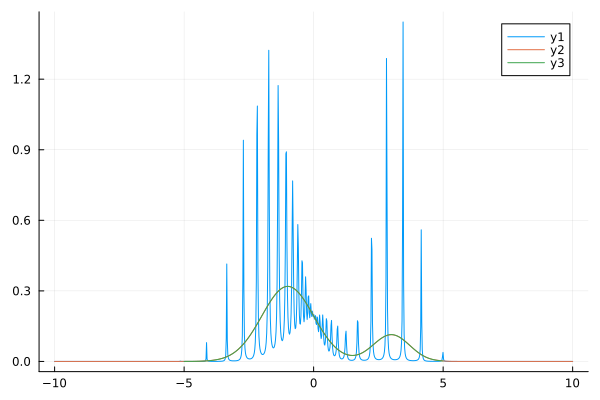

In [10]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
#=
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")
=#

In [12]:
open("data/twopeak_wo_opt.dat","w") do f
    for i in 1:wo_sol.reals.N_real
        println(f, "$(Float64(real.(wo_sol.reals.freq[i])))",  "\t", "$(Float64(imag.(wo_sol.reals.val[i]/pi)))")
    end
end
open("data/twopeak_w_opt.dat","w") do g
    for i in 1:sol.reals.N_real
        println(g, "$(Float64(real.(sol.reals.freq[i])))",  "\t", "$(Float64(imag.(sol.reals.val[i]/pi)))")
    end
end
open("data/twopeak_exact.dat","w") do h
    for i in 1:length(omegas)
        println(h, omegas[i],  "\t", rho(omegas[i]))
    end
end